In [4]:
!pip install tensorflow
!pip install -q keras-core

In [496]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras_core as keras

SEED = 23
keras.utils.set_random_seed(SEED)

In [497]:
original_df = pd.read_csv("./train_data.csv")
test_df = pd.read_csv("./test_data.csv")

In [498]:
original_df

,ID,date,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,143,20140515T000000,98003,47.2857,-122.300,3.0,2.25,1590.0,7748.0,2.0,...,0.0,4.0,7.0,1590.0,0.0,1991.0,0.0,1590.0,7606.0,263000.0
1,1175,20141203T000000,98117,47.6885,-122.380,3.0,NaN,2040.0,4005.0,NaN,...,0.0,4.0,8.0,1740.0,300.0,1930.0,0.0,1380.0,4005.0,620000.0
2,221,20140711T000000,98106,47.5150,-122.359,2.0,1.00,640.0,7768.0,1.0,...,0.0,3.0,6.0,640.0,0.0,1942.0,0.0,NaN,7424.0,165000.0
3,1231,20141117T000000,98144,47.5758,-122.309,2.0,1.50,1240.0,NaN,NaN,...,0.0,NaN,8.0,1080.0,160.0,NaN,0.0,1530.0,1209.0,403000.0
4,509,20150402T000000,98038,47.3531,-122.017,3.0,NaN,1990.0,NaN,2.0,...,NaN,3.0,7.0,1990.0,0.0,2010.0,0.0,2580.0,3800.0,318200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,954,20150423T000000,98014,47.6820,-121.913,3.0,2.50,3230.0,129578.0,1.0,...,0.0,NaN,NaN,2100.0,1130.0,NaN,0.0,2760.0,62059.0,499950.0
1272,104,20150507T000000,98103,47.6857,-122.353,4.0,1.50,NaN,4000.0,1.5,...,2.0,NaN,7.0,1580.0,NaN,1920.0,1990.0,1160.0,4000.0,750000.0
1273,138,20140911T000000,98003,47.2827,-122.302,3.0,NaN,NaN,6600.0,NaN,...,NaN,3.0,7.0,1610.0,0.0,NaN,0.0,1660.0,NaN,250000.0
1274,1529,20140509T000000,98075,47.5884,-122.086,3.0,2.25,3000.0,11665.0,1.5,...,4.0,3.0,11.0,3000.0,0.0,2001.0,0.0,3000.0,15959.0,2400000.0


In [499]:
len(original_df.columns)

21

In [500]:
original_df.describe()

,ID,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,1276.000000,1276.000000,1276.000000,1276.000000,1074.000000,1079.000000,1082.000000,1087.000000,1084.000000,1076.000000,1082.000000,1095.000000,1086.000000,1089.00000,1093.000000,1113.000000,1075.000000,1087.000000,1080.000000,1.276000e+03
mean,783.208464,98076.235110,47.567730,-122.207464,3.388268,2.148054,2140.665434,22913.940202,1.496771,0.011152,0.252311,3.398174,7.695212,1888.30303,279.931382,1971.873315,115.101395,2029.898804,18990.602778,5.610966e+05
std,459.141821,54.734005,0.137067,0.147224,0.937513,0.853977,977.118984,52877.670777,0.534790,0.105063,0.811640,0.654332,1.283757,919.42862,447.916340,28.587697,465.487096,760.953817,39235.248485,3.668160e+05
min,1.000000,98001.000000,47.162200,-122.511000,1.000000,0.000000,540.000000,638.000000,1.000000,0.000000,0.000000,1.000000,5.000000,530.00000,0.000000,1900.000000,0.000000,700.000000,1082.000000,7.800000e+04
25%,384.750000,98029.000000,47.492000,-122.339000,3.000000,1.500000,1420.000000,5383.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1220.00000,0.000000,1953.000000,0.000000,1470.000000,5488.000000,3.262345e+05
50%,778.500000,98059.000000,47.588200,-122.215000,3.000000,2.250000,1990.000000,8145.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1590.00000,0.000000,1971.000000,0.000000,1880.000000,8039.500000,4.675000e+05
75%,1182.250000,98117.000000,47.681300,-122.109750,4.000000,2.500000,2620.000000,14578.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2400.00000,550.000000,1998.000000,0.000000,2440.000000,12263.000000,6.766250e+05
max,1592.000000,98199.000000,47.777500,-121.402000,10.000000,7.500000,7000.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,12.000000,6370.00000,3500.000000,2015.000000,2015.000000,5790.000000,339332.000000,3.204000e+06


In [501]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1276 non-null   int64  
 1   date           1276 non-null   object 
 2   zipcode        1276 non-null   int64  
 3   lat            1276 non-null   float64
 4   long           1276 non-null   float64
 5   bedrooms       1074 non-null   float64
 6   bathrooms      1079 non-null   float64
 7   sqft_living    1082 non-null   float64
 8   sqft_lot       1087 non-null   float64
 9   floors         1084 non-null   float64
 10  waterfront     1076 non-null   float64
 11  view           1082 non-null   float64
 12  condition      1095 non-null   float64
 13  grade          1086 non-null   float64
 14  sqft_above     1089 non-null   float64
 15  sqft_basement  1093 non-null   float64
 16  yr_built       1113 non-null   float64
 17  yr_renovated   1075 non-null   float64
 18  sqft_liv

In [502]:
# Drop unnecesary features for plotting
vis_df = original_df.drop(["date"],inplace=False,axis=1)

In [503]:
#sns.pairplot(vis_df)

<Axes: >

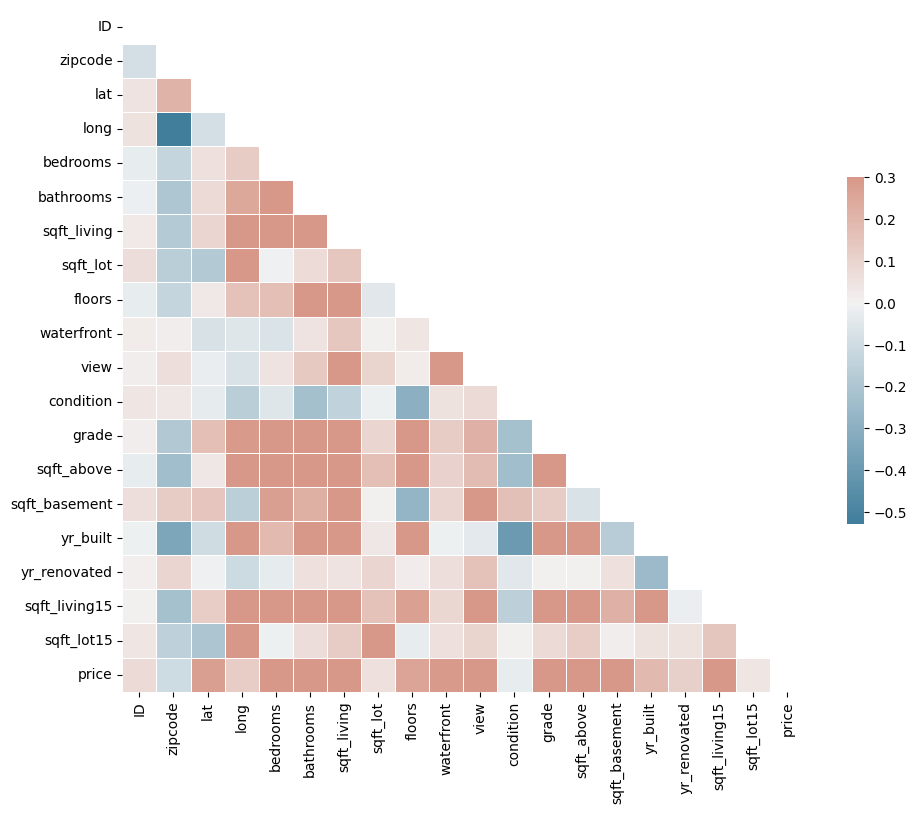

In [504]:
#Ejemplo tomado derechamente de Seaborn.
corr = vis_df.corr()
ones_at_df = np.ones_like(corr, dtype=bool)

mask = np.triu(ones_at_df)
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#1st NAN TREATMENT

In [506]:
null_treated_df = original_df.copy()
TEST_null_treated_df = test_df.copy()

In [508]:
for col in null_treated_df.columns:
  if null_treated_df[col].isna().any():
    null_treated_df[col].fillna(value=null_treated_df[col].mean(), inplace=True)

for col in TEST_null_treated_df.columns:
  if TEST_null_treated_df[col].isna().any():
    TEST_null_treated_df[col].fillna(value=TEST_null_treated_df[col].mean(), inplace=True)

In [509]:
null_treated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1276 non-null   int64  
 1   date           1276 non-null   object 
 2   zipcode        1276 non-null   int64  
 3   lat            1276 non-null   float64
 4   long           1276 non-null   float64
 5   bedrooms       1276 non-null   float64
 6   bathrooms      1276 non-null   float64
 7   sqft_living    1276 non-null   float64
 8   sqft_lot       1276 non-null   float64
 9   floors         1276 non-null   float64
 10  waterfront     1276 non-null   float64
 11  view           1276 non-null   float64
 12  condition      1276 non-null   float64
 13  grade          1276 non-null   float64
 14  sqft_above     1276 non-null   float64
 15  sqft_basement  1276 non-null   float64
 16  yr_built       1276 non-null   float64
 17  yr_renovated   1276 non-null   float64
 18  sqft_liv

#GEOLOCATION CLUSTERING

In [510]:
from sklearn.cluster import KMeans

In [511]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [512]:
X = np.append([null_treated_df["lat"]],[null_treated_df["long"]],0).T
TEST_X = np.append([TEST_null_treated_df["lat"]],[TEST_null_treated_df["long"]],0).T

In [513]:
km = KMeans(n_clusters=3)
TEST_km = KMeans(n_clusters=3)


km.fit(X)
TEST_km.fit(TEST_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

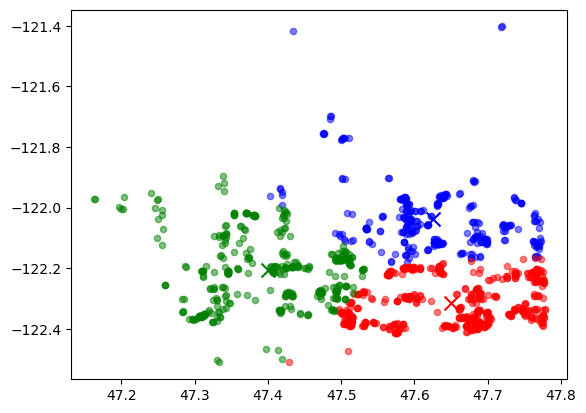

In [514]:
display_cluster(X,km,3)

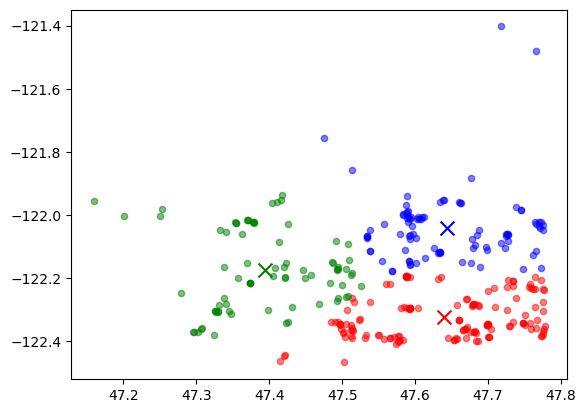

In [515]:
display_cluster(TEST_X,TEST_km,3)

In [516]:
df_with_clustering = null_treated_df.copy()
TEST_df_with_clustering = TEST_null_treated_df.copy()

In [517]:
df_with_clustering.drop(["lat","long"],inplace=True,axis=1)
TEST_df_with_clustering.drop(["lat","long"],inplace=True,axis=1)

In [518]:
df_with_clustering["location"] = km.labels_
TEST_df_with_clustering["location"] = TEST_km.labels_

In [519]:
df_with_clustering.head()

,ID,date,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,location
0,143,20140515T000000,98003,3.0,2.250000,1590.0,7748.000000,2.000000,0.0,0.000000,4.000000,7.0,1590.0,0.0,1991.000000,0.0,1590.000000,7606.0,263000.0,2
1,1175,20141203T000000,98117,3.0,2.148054,2040.0,4005.000000,1.496771,0.0,0.000000,4.000000,8.0,1740.0,300.0,1930.000000,0.0,1380.000000,4005.0,620000.0,1
2,221,20140711T000000,98106,2.0,1.000000,640.0,7768.000000,1.000000,0.0,0.000000,3.000000,6.0,640.0,0.0,1942.000000,0.0,2029.898804,7424.0,165000.0,1
3,1231,20141117T000000,98144,2.0,1.500000,1240.0,22913.940202,1.496771,0.0,0.000000,3.398174,8.0,1080.0,160.0,1971.873315,0.0,1530.000000,1209.0,403000.0,1
4,509,20150402T000000,98038,3.0,2.148054,1990.0,22913.940202,2.000000,0.0,0.252311,3.000000,7.0,1990.0,0.0,2010.000000,0.0,2580.000000,3800.0,318200.0,2


#FIRST DATA ITERATION

In [520]:
fully_drop_df = df_with_clustering.drop(["ID","zipcode","sqft_lot15","date"],inplace=False,axis=1)
TEST_fully_drop_df = TEST_df_with_clustering.drop(["ID","zipcode","sqft_lot15","date"],inplace=False,axis=1)

In [521]:
fully_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1276 non-null   float64
 1   bathrooms      1276 non-null   float64
 2   sqft_living    1276 non-null   float64
 3   sqft_lot       1276 non-null   float64
 4   floors         1276 non-null   float64
 5   waterfront     1276 non-null   float64
 6   view           1276 non-null   float64
 7   condition      1276 non-null   float64
 8   grade          1276 non-null   float64
 9   sqft_above     1276 non-null   float64
 10  sqft_basement  1276 non-null   float64
 11  yr_built       1276 non-null   float64
 12  yr_renovated   1276 non-null   float64
 13  sqft_living15  1276 non-null   float64
 14  price          1276 non-null   float64
 15  location       1276 non-null   int32  
dtypes: float64(15), int32(1)
memory usage: 154.6 KB


In [522]:
fully_drop_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,price,location
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1.276000e+03,1276.000000
mean,3.388268,2.148054,2140.665434,22913.940202,1.496771,0.011152,0.252311,3.398174,7.695212,1888.303030,279.931382,1971.873315,115.101395,2029.898804,5.610966e+05,1.031348
std,0.860047,0.785237,899.715507,48801.383784,0.492882,0.096472,0.747345,0.606110,1.184248,849.331778,414.527295,26.697861,427.223068,702.292645,3.668160e+05,0.757056
min,1.000000,0.000000,540.000000,638.000000,1.000000,0.000000,0.000000,1.000000,5.000000,530.000000,0.000000,1900.000000,0.000000,700.000000,7.800000e+04,0.000000
25%,3.000000,1.750000,1481.000000,5927.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1300.000000,0.000000,1955.000000,0.000000,1520.000000,3.262345e+05,0.000000
50%,3.388268,2.148054,2140.665434,9373.500000,1.496771,0.000000,0.000000,3.000000,7.695212,1795.000000,0.000000,1971.873315,0.000000,2029.898804,4.675000e+05,1.000000
75%,4.000000,2.500000,2475.000000,22913.940202,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,412.500000,1995.000000,0.000000,2310.000000,6.766250e+05,2.000000
max,10.000000,7.500000,7000.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,12.000000,6370.000000,3500.000000,2015.000000,2015.000000,5790.000000,3.204000e+06,2.000000


In [523]:
fully_drop_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,price,location
0,3.0,2.250000,1590.0,7748.000000,2.000000,0.0,0.000000,4.000000,7.0,1590.0,0.0,1991.000000,0.0,1590.000000,263000.0,2
1,3.0,2.148054,2040.0,4005.000000,1.496771,0.0,0.000000,4.000000,8.0,1740.0,300.0,1930.000000,0.0,1380.000000,620000.0,1
2,2.0,1.000000,640.0,7768.000000,1.000000,0.0,0.000000,3.000000,6.0,640.0,0.0,1942.000000,0.0,2029.898804,165000.0,1
3,2.0,1.500000,1240.0,22913.940202,1.496771,0.0,0.000000,3.398174,8.0,1080.0,160.0,1971.873315,0.0,1530.000000,403000.0,1
4,3.0,2.148054,1990.0,22913.940202,2.000000,0.0,0.252311,3.000000,7.0,1990.0,0.0,2010.000000,0.0,2580.000000,318200.0,2


In [524]:
# Limpieza BEDROOMS
fully_drop_df["bedrooms"] = fully_drop_df["bedrooms"].round()
fully_drop_df["bedrooms"].astype("int")

TEST_fully_drop_df["bedrooms"] = TEST_fully_drop_df["bedrooms"].round()
TEST_fully_drop_df["bedrooms"].astype("int")

# Limpieza BATHROOMS
fully_drop_df["bathrooms"] = fully_drop_df["bathrooms"].round()
fully_drop_df["bathrooms"].astype("int")

TEST_fully_drop_df["bathrooms"] = TEST_fully_drop_df["bathrooms"].round()
TEST_fully_drop_df["bathrooms"].astype("int")

# Limpieza FLOORS
fully_drop_df["floors"] = fully_drop_df["floors"].round()
fully_drop_df["floors"].astype("int")

TEST_fully_drop_df["floors"] = TEST_fully_drop_df["floors"].round()
TEST_fully_drop_df["floors"].astype("int")

# Limpieza WATERFRONT
fully_drop_df["waterfront"].astype("int")

TEST_fully_drop_df["waterfront"].astype("int")

# Limpieza VIEW
fully_drop_df["view"] = fully_drop_df["view"].round()
fully_drop_df["view"].astype("int")

TEST_fully_drop_df["view"] = TEST_fully_drop_df["view"].round()
TEST_fully_drop_df["view"].astype("int")

# Limpieza YR_BUILT
fully_drop_df["yr_built"] = fully_drop_df["yr_built"].round()
fully_drop_df["yr_built"].astype("int")

TEST_fully_drop_df["yr_built"] = TEST_fully_drop_df["yr_built"].round()
TEST_fully_drop_df["yr_built"].astype("int")

# Limpieza CONDITION
fully_drop_df["condition"] = fully_drop_df["condition"].round()
fully_drop_df["condition"].astype("int")

TEST_fully_drop_df["condition"] = TEST_fully_drop_df["condition"].round()
TEST_fully_drop_df["condition"].astype("int")

0      3
1      3
2      3
3      3
4      3
      ..
315    3
316    3
317    3
318    4
319    3
Name: condition, Length: 320, dtype: int64

In [525]:
fully_drop_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,price,location
0,3.0,2.0,1590.0,7748.000000,2.0,0.0,0.0,4.0,7.0,1590.0,0.0,1991.0,0.0,1590.000000,263000.0,2
1,3.0,2.0,2040.0,4005.000000,1.0,0.0,0.0,4.0,8.0,1740.0,300.0,1930.0,0.0,1380.000000,620000.0,1
2,2.0,1.0,640.0,7768.000000,1.0,0.0,0.0,3.0,6.0,640.0,0.0,1942.0,0.0,2029.898804,165000.0,1
3,2.0,2.0,1240.0,22913.940202,1.0,0.0,0.0,3.0,8.0,1080.0,160.0,1972.0,0.0,1530.000000,403000.0,1
4,3.0,2.0,1990.0,22913.940202,2.0,0.0,0.0,3.0,7.0,1990.0,0.0,2010.0,0.0,2580.000000,318200.0,2


In [543]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
TEST_sc = StandardScaler()

# STANDARIZING sqft_living
fully_drop_df["sqft_living"] = sc.fit_transform(fully_drop_df[["sqft_living"]])
TEST_fully_drop_df["sqft_living"] = TEST_sc.fit_transform(TEST_fully_drop_df[["sqft_living"]])

# STANDARIZING sqft_lot
fully_drop_df["sqft_lot"] = sc.fit_transform(fully_drop_df[["sqft_lot"]])
TEST_fully_drop_df["sqft_lot"] = TEST_sc.fit_transform(TEST_fully_drop_df[["sqft_lot"]])

# STANDARIZING sqft_above
fully_drop_df["sqft_above"] = sc.fit_transform(fully_drop_df[["sqft_above"]])
TEST_fully_drop_df["sqft_above"] = TEST_sc.fit_transform(TEST_fully_drop_df[["sqft_above"]])

# STANDARIZING sqft_basement
fully_drop_df["sqft_basement"] = sc.fit_transform(fully_drop_df[["sqft_basement"]])
TEST_fully_drop_df["sqft_basement"] = TEST_sc.fit_transform(TEST_fully_drop_df[["sqft_basement"]])

# STANDARIZING sqft_living15
fully_drop_df["sqft_living15"] = sc.fit_transform(fully_drop_df[["sqft_living15"]])
TEST_fully_drop_df["sqft_living15"] = TEST_sc.fit_transform(TEST_fully_drop_df[["sqft_living15"]])

# SCALING price
minmax = MinMaxScaler()
fully_drop_df["price"] = minmax.fit_transform(fully_drop_df[["price"]])


#MODEL FOR CHECKING WEIGHTS

In [528]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(fully_drop_df, test_size=0.2, random_state=23)

In [544]:
y_train = df_train["price"]
X_train = df_train.drop("price",inplace=False,axis=1)

y_test = df_test["price"]
X_test = df_test.drop("price",inplace=False,axis=1)

In [545]:
inputs = keras.layers.Input(shape=(X_train.shape[1],))

output = keras.layers.Dense(1,activation='relu')(inputs)
model = keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 15)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_20 (Dense)                │ (None, 1)                 │         16 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [546]:
loss = keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=opt, loss=loss, metrics=["mean_squared_error", "mean_absolute_error", "root_mean_squared_error"])

In [551]:
val_split = 0.2
batch_size = 32
epochs = 40

my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True
    )
]

In [552]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=val_split,
                    callbacks = my_callbacks,
                    verbose=1)

Epoch 1/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.3786 - mean_absolute_error: 0.8805 - mean_squared_error: 1.3799 - root_mean_squared_error: 1.1739 - val_loss: 1.3905 - val_mean_absolute_error: 0.8760 - val_mean_squared_error: 1.4272 - val_root_mean_squared_error: 1.1947
Epoch 2/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2958 - mean_absolute_error: 0.8466 - mean_squared_error: 1.2970 - root_mean_squared_error: 1.1381 - val_loss: 1.3236 - val_mean_absolute_error: 0.8475 - val_mean_squared_error: 1.3522 - val_root_mean_squared_error: 1.1628
Epoch 3/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2334 - mean_absolute_error: 0.8191 - mean_squared_error: 1.2346 - root_mean_squared_error: 1.1103 - val_loss: 1.2731 - val_mean_absolute_error: 0.8256 - val_mean_squared_error: 1.2947 - val_root_mean_squared_error: 1.1379
Epoch 4/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1861 - mean_absolute_error: 0.7979 - mean_squared_error: 1.1872 - root_mean_squared_error: 1.

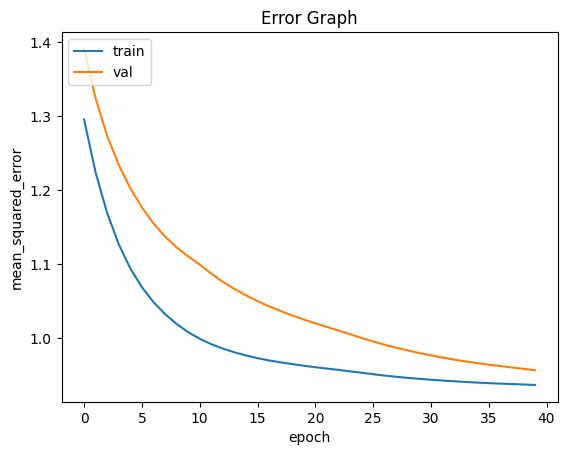

In [553]:
def plot_losses(history, loss):
  "Función para graficar la función de pérdida del modelo"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel(loss.name)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

plot_losses(history, loss)

In [554]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6998581886291504
Test accuracy: 0.6353499889373779


In [555]:
predictedData = model.predict(TEST_fully_drop_df)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [556]:
predictedData

array([[0.35075375],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.24733725],
       [0.        ],
       [0.0232738 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.90432   ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.2141068 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.476294  ],
       [0.   

In [557]:
sc.inverse_transform(predictedData)

array([[3.5075375e-01],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [2.4733725e-01],
       [1.3086014e-16],
       [2.3273796e-02],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.9043200e+00],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.3086014e-16],
       [1.308601

In [558]:
DATA = minmax.inverse_transform(predictedData)

In [559]:
finalData = []
for x in DATA:
  finalData.append(x[0])

In [560]:
# Create an empty DataFrame
empty_df = pd.DataFrame()

# Add the "ID" and "price" columns to the DataFrame
empty_df["ID"] = test_df["ID"]
empty_df["price"] = finalData  # You can set the "price" values as needed

# Save the DataFrame to a CSV file with headers
empty_df.to_csv("./submission_3_w_other_format.csv", index=False)

In [493]:
TEST_fully_drop_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,location
0,3.0,4.0,2.405903,-0.079313,2.0,0.0,2.0,3.0,7.638889,2.217840,0.905520,1998.0,0.0,1.825070,0
1,3.0,2.0,-0.464950,-0.294249,1.0,0.0,0.0,3.0,8.000000,0.000000,-0.673609,1970.0,0.0,-0.101867,2
2,4.0,2.0,1.604976,-0.264162,2.0,0.0,0.0,3.0,10.000000,2.125142,-0.673609,1999.0,82.1,2.029016,0
3,4.0,2.0,0.387985,0.000000,2.0,0.0,0.0,3.0,9.000000,0.769436,-0.673609,2001.0,0.0,-0.284715,2
4,1.0,1.0,-1.765155,-0.251365,1.0,0.0,0.0,3.0,4.000000,-1.629120,-0.673609,1948.0,0.0,-0.734803,1
